# Cost Function

A cost function is an important parameter that determines how well a machine learning model performs for a given dataset. It calculates the difference between the expected value and predicted value and represents it as a single real number. **Cost function is a measure of how wrong the model is in estimating the relationship between X (input) and Y (output) Parameter.**

## Importing libraries

In [1]:
# Importing necessary libraries
import sklearn
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

print(pd.__version__)
print(np.__version__)
print(sklearn.__version__)

2.1.1
1.26.1
1.5.0


## Create sample data

In [2]:
# creating the sample dataset
experience = [1.2,1.5,1.9,2.2,2.4,2.5,2.8,3.1,3.3,3.7,4.2,4.4]
salary = [1.7,2.4,2.3,3.1,3.7,4.2,4.4,6.1,5.4,5.7,6.4,6.2]

data = pd.DataFrame({
    'salary': salary,
    'experience': experience
})

data.head()

,salary,experience
0,1.7,1.2
1,2.4,1.5
2,2.3,1.9
3,3.1,2.2
4,3.7,2.4


## Plotting the data

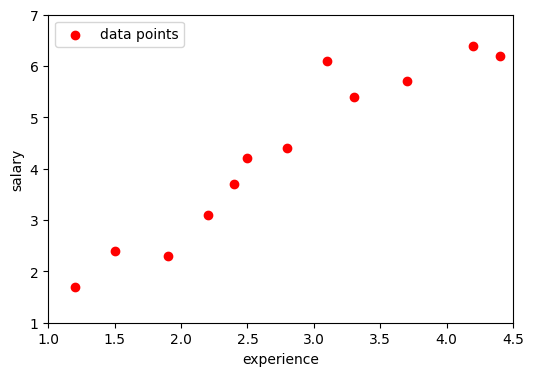

In [5]:
# plotting the data
plt.figure(figsize = (6,4))
plt.scatter(data.experience, data.salary, color = 'red', label = 'data points')
plt.xlim(1, 4.5)
plt.ylim(1, 7)
plt.xlabel('experience')
plt.ylabel('salary')
plt.legend()

## Starting the line using small values of parameters

Text(0.5, 1.0, 'Beta value 0.8 with MSE: 1.763')

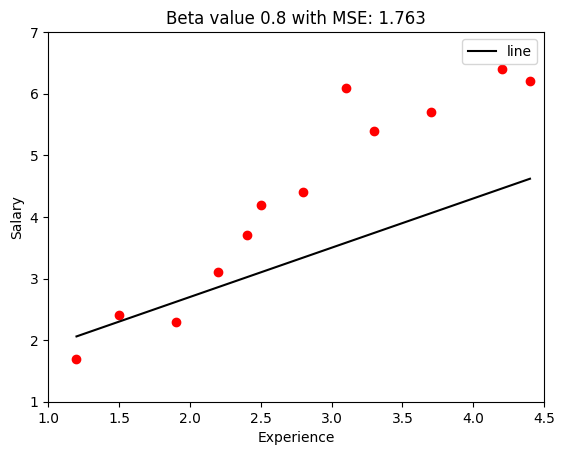

In [9]:
# making lines for different Values of Beta 0.1, 0.8, 1.5
beta = 0.8
# keeping intercept constant
b = 1.1

# to store predicted points
line1 = []

# generating predictions for every data point
for i in range(len(data)):
    line1.append(data.experience[i]*beta + b)

# Plotting the line
plt.scatter(data.experience, data.salary, color = 'red')
plt.plot(data.experience, line1, color = 'black', label = 'line')
plt.xlim(1,4.5)
plt.ylim(1,7)
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
MSE = mean_squared_error(data.salary, line1)
plt.title('Beta value ' + str(beta) + ' with MSE: '+ str(MSE.round(3)))

## Computing cost over a range of values of beta

In [10]:
# function to calculate error
def error(beta, data):
  # b is constant
    b = 1.1
  
    salary = []
    experience  = data.experience
  
    # Loop to calculate predict salary variables
    for i in range(len(data.experience)):
        tmp = data.experience[i] * beta + b
        salary.append(tmp)
    MSE = mean_squared_error(data.salary, salary)
    return MSE

In [13]:
# Range of slopes from 0 to 1.5 with increment of 0.01
slope = [i/100 for i in range(0,150)]
Cost = []
for i in slope:
    cost = error(beta = i, data = data)
    Cost.append(cost)

In [14]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'Beta' : slope,
    'Cost' : Cost
})

Cost_table.head()

,Beta,Cost
0,0.00,12.791667
1,0.01,12.585876
2,0.02,12.381806
3,0.03,12.179455
4,0.04,11.978824


## Visualising cost with respect to beta

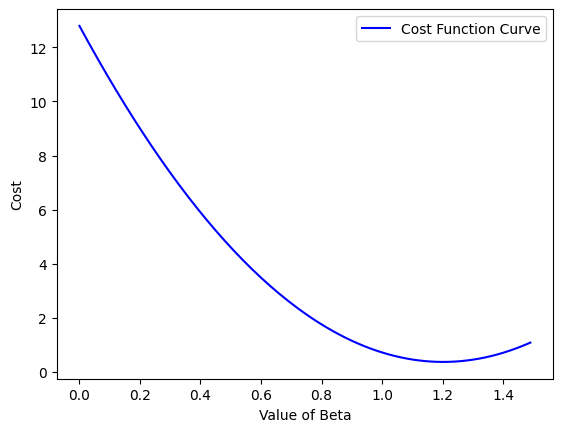

In [15]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.Beta, Cost_table.Cost, color = 'blue', label = 'Cost Function Curve')
plt.xlabel('Value of Beta')
plt.ylabel('Cost')
plt.legend()